# data prediction using regression  and multiregression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('covid19data.csv')


C:\Users\Harun_me\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data=df.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,day,month,year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
353027,9.0,08/10/2020,NaN,NaN,NaN,Kargil,Ladakh,Hospitalized,8.0,10.0,2020.0
353028,29.0,08/10/2020,NaN,NaN,NaN,Leh,Ladakh,Recovered,8.0,10.0,2020.0
353029,10.0,08/10/2020,NaN,NaN,NaN,Kargil,Ladakh,Recovered,8.0,10.0,2020.0
353030,-8.0,08/10/2020,NaN,NaN,NaN,Solan,Himachal Pradesh,Migrated_Other,8.0,10.0,2020.0


# number of cases  group by month and date

In [4]:
data.groupby(['month','day'])['Num Cases'].sum()


month  day 
1.0    30.0         1.0
2.0    2.0          1.0
       3.0          1.0
3.0    2.0          2.0
       3.0          1.0
                 ...   
10.0   4.0     152399.0
       5.0     136877.0
       6.0     154823.0
       7.0     163073.0
       8.0     150531.0
Name: Num Cases, Length: 224, dtype: float64

# number of cases who is Hospitalized 

In [5]:
Day=data[data['Current Status']=='Hospitalized'].groupby(['month','day'])['Num Cases'].sum()
Day

month  day 
3.0    4.0         5.0
       5.0         1.0
       7.0         2.0
       9.0         4.0
       10.0        4.0
                ...   
10.0   4.0     74770.0
       5.0     60130.0
       6.0     71869.0
       7.0     78809.0
       8.0     70824.0
Name: Num Cases, Length: 217, dtype: float64

In [13]:
x=np.arange(len(Day))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [14]:
y=Day.values
y

array([5.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00,
       8.0000e+00, 4.0000e+00, 6.0000e+00, 1.1000e+01, 8.0000e+00,
       1.2000e+01, 1.4000e+01, 2.2000e+01, 2.1000e+01, 5.2000e+01,
       6.7000e+01, 5.9000e+01, 8.2000e+01, 6.3000e+01, 7.5000e+01,
       5.8000e+01, 1.4000e+02, 1.2300e+02, 1.0600e+02, 1.7800e+02,
       3.0600e+02, 4.2300e+02, 4.8500e+02, 5.5600e+02, 5.7600e+02,
       6.0600e+02, 4.8500e+02, 5.7000e+02, 5.6300e+02, 8.1200e+02,
       8.7000e+02, 8.5300e+02, 7.5800e+02, 1.2430e+03, 1.0310e+03,
       8.8400e+02, 1.0610e+03, 9.2200e+02, 1.3700e+03, 1.5790e+03,
       1.2390e+03, 1.5370e+03, 1.2920e+03, 1.6670e+03, 1.4080e+03,
       1.8350e+03, 1.6070e+03, 1.5680e+03, 1.9020e+03, 1.7050e+03,
       1.8020e+03, 2.3960e+03, 2.5640e+03, 2.9520e+03, 3.6560e+03,
       2.9710e+03, 3.6020e+03, 3.3440e+03, 3.3390e+03, 3.1750e+03,
       4.3110e+03, 3.5920e+03, 3.5620e+03, 3.7260e+03, 3.9910e+03,
       3.8080e+03, 4.7940e+03, 5.0490e+03, 4.6280e+03, 6.1540e

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly=PolynomialFeatures(degree=8)
X=poly.fit_transform(x.reshape(-1,1))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, ...,
        6.40000000e+01, 1.28000000e+02, 2.56000000e+02],
       ...,
       [1.00000000e+00, 2.14000000e+02, 4.57960000e+04, ...,
        9.60467425e+13, 2.05540029e+16, 4.39855662e+18],
       [1.00000000e+00, 2.15000000e+02, 4.62250000e+04, ...,
        9.87712976e+13, 2.12358290e+16, 4.56570323e+18],
       [1.00000000e+00, 2.16000000e+02, 4.66560000e+04, ...,
        1.01559957e+14, 2.19369506e+16, 4.73838134e+18]])

In [17]:
from sklearn.linear_model import LinearRegression 

In [18]:
reg=LinearRegression ()
reg.fit(X,y)

LinearRegression()

In [55]:
reg.coef_

array([ 0.00000000e+00, -1.58880695e+02,  8.97140279e+00, -1.63603958e-01,
        1.36398100e-03, -3.48129072e-06])

In [56]:
reg.intercept_

616.2158176539851

In [19]:
yp=reg.predict(X)
yp

array([-4.48298721e+02, -4.48158417e+02, -4.47241148e+02, -4.44878464e+02,
       -4.40498758e+02, -4.33620189e+02, -4.23843904e+02, -4.10847538e+02,
       -3.94378997e+02, -3.74250511e+02, -3.50332956e+02, -3.22550425e+02,
       -2.90875062e+02, -2.55322138e+02, -2.15945359e+02, -1.72832420e+02,
       -1.26100774e+02, -7.58936318e+01, -2.23761655e+01,  3.42680693e+01,
        9.38405143e+01,  1.56130791e+02,  2.20919690e+02,  2.87981980e+02,
        3.57089030e+02,  4.28011265e+02,  5.00520442e+02,  5.74391776e+02,
        6.49405897e+02,  7.25350658e+02,  8.02022796e+02,  8.79229449e+02,
        9.56789535e+02,  1.03453500e+03,  1.11231194e+03,  1.18998158e+03,
        1.26742118e+03,  1.34452477e+03,  1.42120384e+03,  1.49738784e+03,
        1.57302467e+03,  1.64808102e+03,  1.72254264e+03,  1.79641448e+03,
        1.86972084e+03,  1.94250534e+03,  2.01483086e+03,  2.08677941e+03,
        2.15845193e+03,  2.22996804e+03,  2.30146567e+03,  2.37310072e+03,
        2.44504661e+03,  

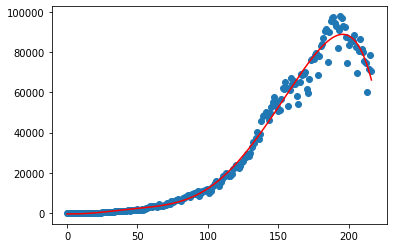

In [20]:
plt.scatter(x,y)
plt.plot(x,yp,color='r')
plt.show()

In [73]:
reg.score(X,y)*100

98.65550672917274

In [24]:
reg.predict(poly.transform([[30]]))

array([802.02279576])

In [96]:
reg.predict(poly.transform([[230]]))

array([53506.52722528])